In [3]:
import MDAnalysis as mda
from MDAnalysis.analysis import gnm
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [4]:
u1 = mda.Universe("md_0_1_298.gro","md_0_1_298.xtc")
u2 = mda.Universe("md_0_1_490.gro","md_0_1_490.xtc")

In [5]:
nma1 = gnm.GNMAnalysis(u1, select='name CA', cutoff=7.0)
nma1.run()
nma2 = gnm.GNMAnalysis(u2, select='name CA', cutoff=7.0)
nma2.run()

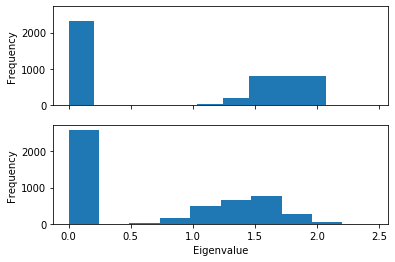

In [6]:
eigenvalues1 = [res[1] for res in nma1.results]
eigenvalues2 = [res[1] for res in nma2.results]

histfig, histax = plt.subplots(nrows=2, sharex=True, sharey=True)
histax[0].hist(eigenvalues1)
histax[1].hist(eigenvalues2)

histax[1].set_xlabel('Eigenvalue')
histax[0].set_ylabel('Frequency')
histax[1].set_ylabel('Frequency');

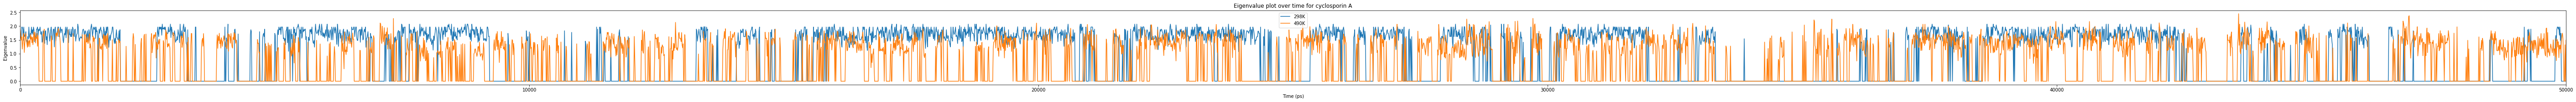

In [7]:
time1 = [res[0] for res in nma1.results]
time2 = [res[0] for res in nma2.results]
linefig, lineax = plt.subplots()
plt.plot(time1, eigenvalues1, label='298K')
plt.plot(time2, eigenvalues2, label='490K')
lineax.set_xlabel('Time (ps)')
lineax.set_ylabel('Eigenvalue')
lineax.figure.set_size_inches(100,3)
lineax.set_xbound(-1,50001)
#a = 1000*np.array(list(range(1,51)))
#lineax.set_xticks(ticks=a)
lineax.set_title('Eigenvalue plot over time for cyclosporin A')
plt.legend();
linefig.savefig("eigen.pdf", bbox_inches="tight")

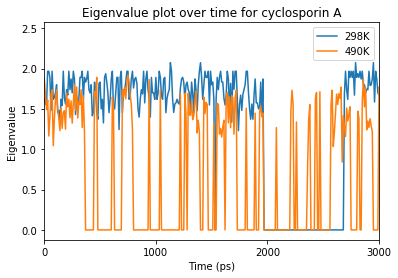

In [8]:
# subset of trajectory
time1 = [res[0] for res in nma1.results]
time2 = [res[0] for res in nma2.results]
linefig, lineax = plt.subplots()
plt.plot(time1, eigenvalues1, label='298K')
plt.plot(time2, eigenvalues2, label='490K')
lineax.set_xlabel('Time (ps)')
lineax.set_ylabel('Eigenvalue')
lineax.figure.set_size_inches(6,4)
lineax.set_xbound(-1,3000)
a = 100*np.array((0,10,20,30))
lineax.set_xticks(ticks=a)
lineax.set_title('Eigenvalue plot over time for cyclosporin A')
plt.legend();

GNM with close contacts ONLY

In [12]:
nma_close = gnm.closeContactGNMAnalysis(u1, select='name CA', cutoff=7.0, weights='size')
nma_close.run()

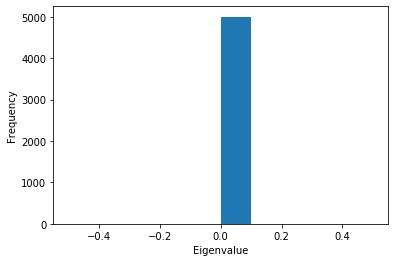

In [13]:
eigenvalues_close = [res[1] for res in nma_close.results]

plt.hist(eigenvalues_close)
plt.xlabel('Eigenvalue')
plt.ylabel('Frequency');

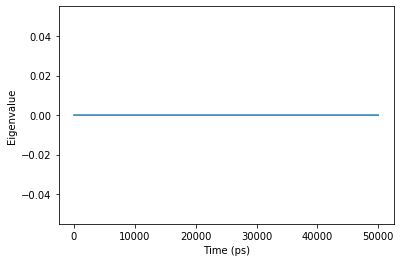

In [14]:
time_close = [res[0] for res in nma_close.results]
ax = plt.plot(time_close, eigenvalues_close)
plt.xlabel('Time (ps)')
plt.ylabel('Eigenvalue');